In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

c:\Users\itsab\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))
else:
    print("CUDA is not available")

CUDA is not available


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [5]:
train_dataset = torchvision.datasets.MNIST(root = "./mnist_data", train = True, transform = transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root = "./mnist_data", train = False, transform = transforms.ToTensor())    

### Hyper-parameters

In [4]:
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [6]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False)


In [7]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


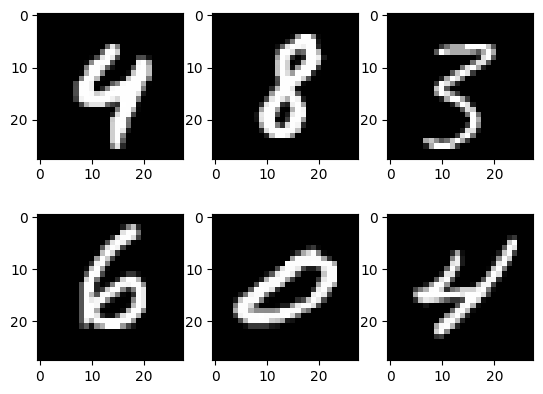

In [8]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap="gray")

plt.show()

In [17]:
class neuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(neuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)

    return out # There is no need to return softmax value as cross entropy do it on its own

if __name__ == "__main__":
  
  model = neuralNet(input_size, hidden_size, num_classes)
  
  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
  
  # training loop
  n_total_steps = len(train_loader)
  for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      # Input size in  each batch of train_loader is 100, 1, 28, 28
      # We need to reshape it to [ 100, (28*28 = 784) ]
      
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)
      
      # Forward pass  
      output = model(images)
      loss = criterion(output, labels)
      
      # Backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
      if (i+1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}")
      

Epoch [1/2], Step [100/600], Loss: 0.6039
Epoch [1/2], Step [200/600], Loss: 0.3504
Epoch [1/2], Step [300/600], Loss: 0.3942
Epoch [1/2], Step [400/600], Loss: 0.3401
Epoch [1/2], Step [500/600], Loss: 0.2955
Epoch [1/2], Step [600/600], Loss: 0.2210
Epoch [2/2], Step [100/600], Loss: 0.1888
Epoch [2/2], Step [200/600], Loss: 0.2399
Epoch [2/2], Step [300/600], Loss: 0.2150
Epoch [2/2], Step [400/600], Loss: 0.2694
Epoch [2/2], Step [500/600], Loss: 0.1440
Epoch [2/2], Step [600/600], Loss: 0.1332


In [21]:
# Testing

# Here we dont need to compute gradients, so we use torch.no_grad

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        output = model(images)
        
        few, predictions = torch.max(output, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
        
        
    accuracy = 100.0 * n_correct / n_samples
    print(f"Accuracy: {accuracy}")

Accuracy: 95.32
